## Spending Personality Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset 
df = pd.read_csv("./data/data.csv", sep='\t')

# Basic Info
df.shape
df.info()
display(df.head())
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Shape: (2240, 29)


### Understanding the Data

In [3]:
display(df.describe(include="number").T.round(2))


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [4]:
# Quick category peek
for col in ["Education", "Marital_Status"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False).head(10))


Value counts for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Value counts for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


### Cleaning

In [5]:
## Clean Categorical Columns
df['Marital_Status'] = df['Marital_Status'].str.strip()
df['Education'] = df['Education'].str.strip()

In [6]:
# Fixing Wired Martial_Status Entries
martial_map = {
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
}

df['Marital_Status_norm'] = df['Marital_Status'].replace(martial_map)


# Normalize 'Education' Entries
edu_map = {
    '2n Cycle': 'Graduate',
    'Graduation': 'Graduate',
    'Master': 'Post-Graduate',
    'PhD': 'Post-Graduate',
    'Basic': 'Basic'
}

df['Education_norm'] = df['Education'].replace(edu_map)

In [7]:
# Parse Data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)

In [8]:
# Impute Missing Income 
df['Income']= pd.to_numeric(df['Income'], errors='coerce')
group_median = df.groupby(['Education_norm', 'Marital_Status_norm'])['Income'].transform('median')
df['Income'] = df['Income'].fillna(group_median)
df['Income'] = df['Income'].fillna(df['Income'].median())

print("Remaining nulls in income:", df['Income'].isnull().sum())
df[['Education', 'Education_norm', 'Marital_Status', 'Marital_Status_norm']].head(10)

Remaining nulls in income: 0


,Education,Education_norm,Marital_Status,Marital_Status_norm
0,Graduation,Graduate,Single,Single
1,Graduation,Graduate,Single,Single
2,Graduation,Graduate,Together,Together
3,Graduation,Graduate,Together,Together
4,PhD,Post-Graduate,Married,Married
5,Master,Post-Graduate,Together,Together
6,Graduation,Graduate,Divorced,Divorced
7,PhD,Post-Graduate,Married,Married
8,PhD,Post-Graduate,Together,Together
9,PhD,Post-Graduate,Together,Together


### Feature Engineering

In [9]:
# Reference date - Today for our age & tenure calculations
REF_DATE = pd.Timestamp.today().normalize()

# Calculate Customer Age
df['Age'] = REF_DATE.year - df['Year_Birth']

# Children QTY
df['Children'] = df['Kidhome'] + df['Teenhome']

# Customer Tenure  : Measures loyalty or relationship age
df['Customer_For_Days'] = (REF_DATE - df['Dt_Customer']).dt.days
df['Customer_For_years'] = (df['Customer_For_Days'] / 365.25).round(1)


# Total Spending ( Sum of all Mnt* columns)
mnt_cols = [col for col in df.columns if col.startswith('Mnt')]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchase 
purchase_cols = [col for col in df.columns if col.startswith('Num') and col.endswith('Purchases')]
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

In [10]:

# Total Purchase 
purchase_cols = [col for col in df.columns if col.startswith('Num') and col.endswith('Purchases')]
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

# Average Spend Per Purchase 
df["AvgMntPerPurchase"] = np.where(df['TotalPurchases'] > 0,
                                   df['TotalMnt'] / df['TotalPurchases'], 
                                   np.nan)

In [11]:
# CHANNEL SHARES
for channel in ['Web', 'Catalog', 'Store']:
    col = f'Num{channel}Purchases'
    if col in df.columns:
        df[f'{channel}PurchaseShare'] = np.where(df['TotalPurchases'] > 0,
                                                 df[col] / df['TotalPurchases'],
                                                 np.nan)
        


# Deal Purchase Rate
df['DealPurchaseRate'] = np.where(df['TotalPurchases'] > 0,
                                  df['NumDealsPurchases'] / df['TotalPurchases'],
                                  np.nan)


# Campaign Response Rate
cmp_cols = [col for col in df.columns if col.startswith('AcceptedCmp')]
df['CampaignsAccepted'] = df[cmp_cols].sum(axis=1)
df['Responded'] = (df['Response'] == 1).astype(int)

In [12]:
# Checking the changes 
df[['Age', 'Children', 'Customer_For_years', 'TotalMnt', 'TotalPurchases', 
    'AvgMntPerPurchase', 'WebPurchaseShare', 'CatalogPurchaseShare',
    'StorePurchaseShare', 'DealPurchaseRate', 'CampaignsAccepted', 'Responded']].head(10)

,Age,Children,Customer_For_years,TotalMnt,TotalPurchases,AvgMntPerPurchase,WebPurchaseShare,CatalogPurchaseShare,StorePurchaseShare,DealPurchaseRate,CampaignsAccepted,Responded
0,68,0,13.2,1617,25,64.680000,0.320000,0.400000,0.160000,0.120000,0,1
1,71,2,11.7,27,6,4.500000,0.166667,0.166667,0.333333,0.333333,0,0
2,60,0,12.2,776,21,36.952381,0.380952,0.095238,0.476190,0.047619,0,0
3,41,1,11.7,53,8,6.625000,0.250000,0.000000,0.500000,0.250000,0,0
4,44,1,11.8,422,19,22.210526,0.263158,0.157895,0.315789,0.263158,0,0
5,58,1,12.2,716,22,32.545455,0.272727,0.181818,0.454545,0.090909,0,0
6,54,1,13.0,590,21,28.095238,0.333333,0.142857,0.333333,0.190476,0,0
7,40,1,12.5,169,10,16.900000,0.400000,0.000000,0.400000,0.200000,0,0
8,51,1,12.4,46,6,7.666667,0.500000,0.000000,0.333333,0.166667,0,1
9,75,2,11.7,49,2,24.500000,0.500000,0.000000,0.000000,0.500000,1,0


## Data Cleaning & Feature Engineering Summary

### 1. Data Cleaning
We started by inspecting the dataset for missing values, incorrect data types, and inconsistent categories.

- **Missing Values:** Only the `Income` column had missing entries (~1%).  
  → Imputed using the **median income** of each `(Education_norm, Marital_Status_norm)` group.  
- **Categorical Normalization:**
  - Mapped unusual `Marital_Status` values like `"YOLO"`, `"Absurd"`, and `"Alone"` to `"Single"`.
  - Simplified `Education` levels by merging similar categories:
    - `"2n Cycle"` and `"Graduation"` → `"Graduate"`.
    - `"Master"` and `"PhD"` → `"Postgraduate"`.
    - `"Basic"` kept as `"Basic"`.
- **Date Parsing:** Converted `Dt_Customer` to proper datetime format for tenure calculations.

### 2. Feature Engineering
Created meaningful new variables to better represent customer behavior and demographics:

| Feature | Description | Insight |
|----------|--------------|----------|
| **Age** | `current_year - Year_Birth` | Captures life stage and spending maturity. |
| **Children** | `Kidhome + Teenhome` | Indicates family size and dependency load. |
| **Customer_For_years** | Tenure calculated from `Dt_Customer`. | Reflects customer loyalty and relationship length. |
| **TotalMnt** | Sum of all `Mnt*` (spending) columns. | Represents overall spending volume. |
| **TotalPurchases** | Sum of all `Num*Purchases` columns. | Measures overall purchase activity. |
| **AvgMntPerPurchase** | `TotalMnt / TotalPurchases`. | Shows average order value per transaction. |
| **WebPurchaseShare**, **CatalogPurchaseShare**, **StorePurchaseShare** | Ratio of purchases per channel. | Highlights preferred shopping channels. |
| **DealPurchaseRate** | `NumDealsPurchases / TotalPurchases`. | Indicates price sensitivity or bargain-hunting behavior. |
| **CampaignsAccepted** | Sum of all `AcceptedCmp*` columns. | Shows how often the customer accepted previous campaigns. |
| **Responded** | Binary flag from `Response` (1 if accepted last campaign). | Reflects latest engagement behavior. |

### 3. Why These Features Matter
These engineered features summarize customer spending habits and engagement patterns.  
They help us:
- Compare **planned vs. impulsive** shoppers (e.g., high deal rate vs. low deal rate).
- Understand **loyalty** and **tenure** (longer customers may behave differently).
- Detect **channel preferences** (online vs. in-store).
- Prepare for building **spending personality profiles** (Saver, Splurger, Planner, etc.).

---

The dataset is now cleaned, consistent, and enriched with features ready for exploratory analysis.


## Exploratory Data Analysis

In [13]:
# Numeric Summary
display(df[['Income', 'Age', 'Children', 'TotalMnt', 'TotalPurchases',
            'AvgMntPerPurchase', 'DealPurchaseRate', 'CampaignsAccepted',
            'Customer_For_years']].describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52240.66,25038.85,1730.00,35538.75,51369.00,68289.75,666666.0
Age,2240.0,56.19,11.98,29.00,48.00,55.00,66.00,132.0
Children,2240.0,0.95,0.75,0.00,0.00,1.00,1.00,3.0
TotalMnt,2240.0,605.80,602.25,5.00,68.75,396.00,1045.50,2525.0
TotalPurchases,2240.0,14.86,7.68,0.00,8.00,15.00,21.00,44.0
AvgMntPerPurchase,2236.0,33.33,45.03,0.53,9.71,23.38,45.35,1679.0
DealPurchaseRate,2236.0,0.18,0.11,0.00,0.08,0.17,0.25,1.0
CampaignsAccepted,2240.0,0.30,0.68,0.00,0.00,0.00,0.00,4.0
Customer_For_years,2240.0,12.33,0.55,11.40,11.90,12.30,12.80,13.3


In [19]:
Check_zero_puchase  = df['TotalPurchases'] == 0
print("Number of customers with zero purchases:", Check_zero_puchase.sum())

Number of customers with zero purchases: 4


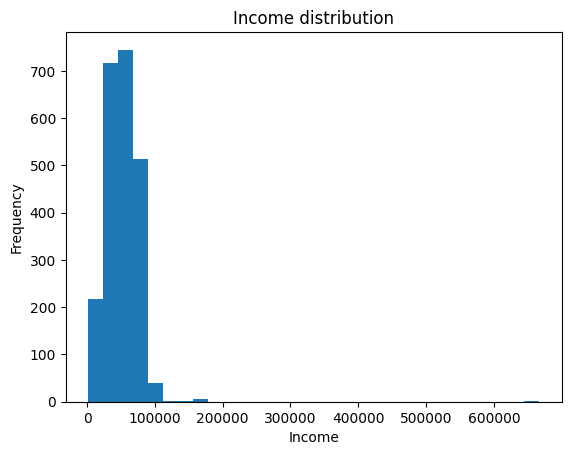

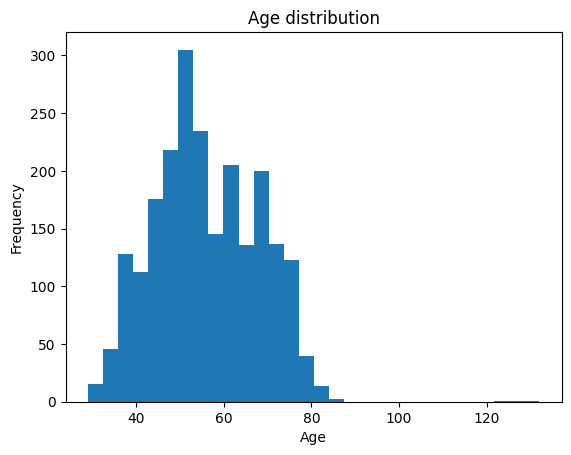

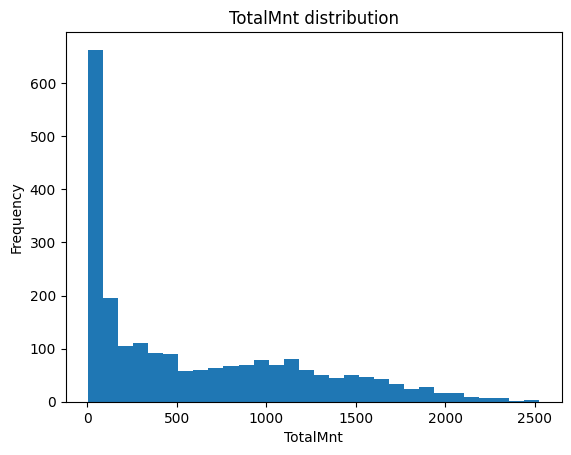

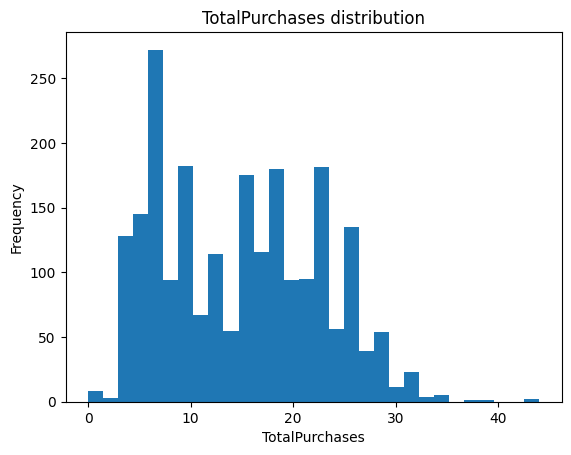

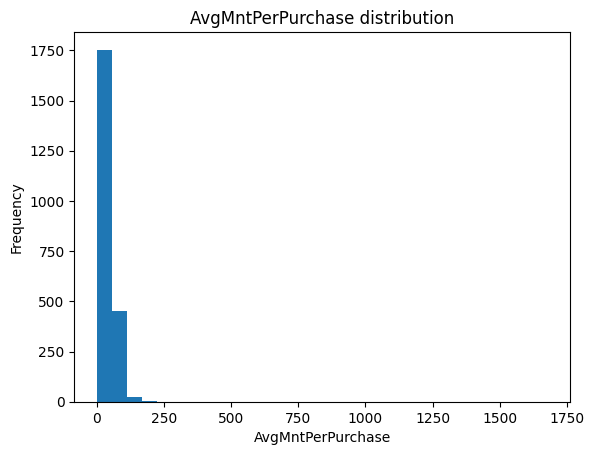

In [17]:
# Histograms
def plot_hist(series, title, bins=30):
    plt.figure()
    series.dropna().plot(kind='hist', bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel('Frequency')
    plt.show()

for col in ['Income', 'Age', 'TotalMnt', 'TotalPurchases', 'AvgMntPerPurchase']:
    if col in df.columns:
        plot_hist(df[col], f'{col} distribution')

What the charts tell us
1. **Income distribution**
- Very right-skewed: most customers earn under $100K, but there are a few extreme outliers up to $600K+.
- These outliers will heavily influence correlations and averages.

2. **Age distribution**
- Centered around 45–65 years, meaning this customer base is mostly middle-aged adults.
- The one record showing Age >120 is clearly an outlier — likely a data entry error (e.g., wrong birth year). <br/>
→ We might need to cap Age at 90 later.

3. **TotalMnt (Total Spend)**
- Also right-skewed: most people spend under $1,000, but a small fraction go up to $2,500+.
- This indicates a few heavy buyers — possibly our “Splurgers” or “High-value” personalities later.

4.**Total Purchases**
- Ranges roughly 0–40, average ~15 — a wide range in engagement.
- Suggests there are light shoppers and heavy repeat buyers — a strong behavioral differentiator.

5. **AvgMntPerPurchase**
- Extremely right-skewed — most purchases are small, but some individuals spend hundreds per purchase.

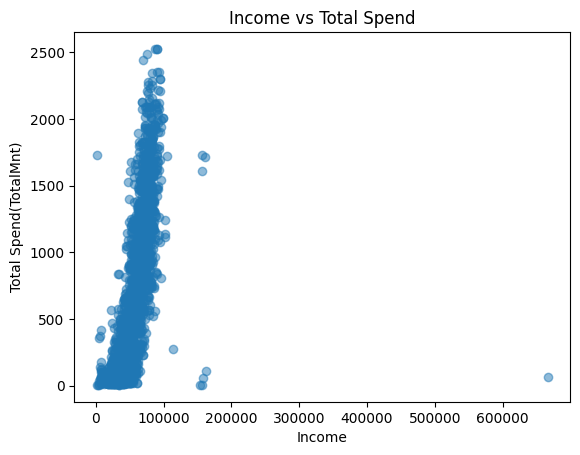

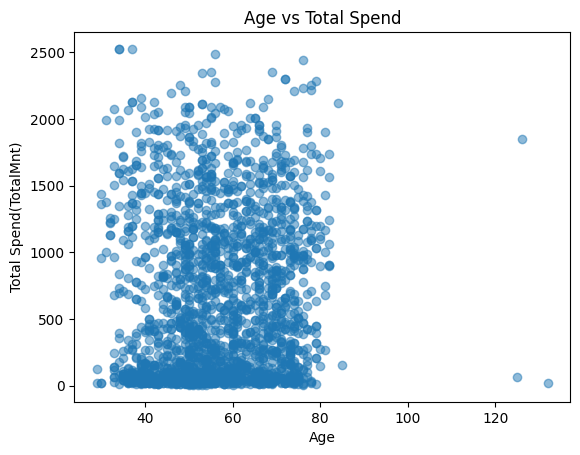

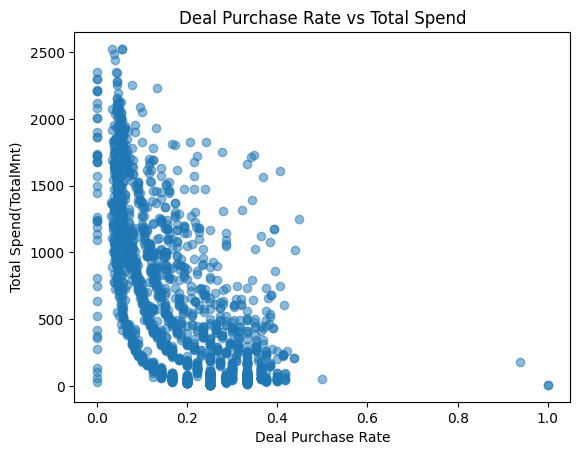

In [18]:
# Relationship Check

plt.figure()
plt.scatter(df['Income'], df['TotalMnt'], alpha=0.5)
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend(TotalMnt)')
plt.show()

plt.figure()
plt.scatter(df['Age'], df['TotalMnt'], alpha=0.5)
plt.title('Age vs Total Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend(TotalMnt)')
plt.show()

plt.figure()
plt.scatter(df['DealPurchaseRate'], df['TotalMnt'], alpha=0.5)
plt.title('Deal Purchase Rate vs Total Spend')
plt.xlabel('Deal Purchase Rate')
plt.ylabel('Total Spend(TotalMnt)')
plt.show()

### Relationships**
**Income vs Total Spend**
- Clear positive relationship: higher income → higher spend, but with a wide vertical spread.<br/>
→ Interpretation: income affects spending capacity, but not alone — other factors (deals, habits, family size) matter.

**Age vs Total Spend**
- No obvious linear trend — spending seems scattered across ages.<br/>
→ Spending behavior is not strongly age-driven.

**Deal Purchase Rate vs Total Spend**
- Negative trend: as deal rate increases, total spend decreases.<br/>
→ Bargain hunters tend to spend less overall — consistent with the “Saver” archetype we’ll define later.

In [24]:
# Select Numeric Columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation Matrix
corr = df[numeric_cols].corr()

# Focus on correlations with Spending Behavior
target_vars =['TotalMnt', 'TotalPurchases']
for target in target_vars:
    if target in corr.columns:
        print(f"\nTop correlations with {target}:")
        display(corr[target].sort_values(ascending=False).head(10))
        display(corr[target].sort_values(ascending=True).head(10))
            


Top correlations with TotalMnt:


TotalMnt                1.000000
MntWines                0.891839
MntMeatProducts         0.842965
NumCatalogPurchases     0.778577
TotalPurchases          0.753903
CatalogPurchaseShare    0.719173
NumStorePurchases       0.674669
Income                  0.664989
MntFishProducts         0.642818
AvgMntPerPurchase       0.617745
Name: TotalMnt, dtype: float64

DealPurchaseRate     -0.655153
Kidhome              -0.556669
NumWebVisitsMonth    -0.500218
Children             -0.498888
StorePurchaseShare   -0.164175
Teenhome             -0.138384
Year_Birth           -0.111306
NumDealsPurchases    -0.065112
Complain             -0.037058
ID                   -0.018054
Name: TotalMnt, dtype: float64


Top correlations with TotalPurchases:


TotalPurchases          1.000000
NumStorePurchases       0.820259
NumWebPurchases         0.777831
TotalMnt                0.753903
NumCatalogPurchases     0.735198
MntWines                0.712789
CatalogPurchaseShare    0.567561
Income                  0.563738
MntMeatProducts         0.554229
MntGoldProds            0.493314
Name: TotalPurchases, dtype: float64

Kidhome              -0.477895
DealPurchaseRate     -0.425541
StorePurchaseShare   -0.331116
NumWebVisitsMonth    -0.312288
Children             -0.245790
Year_Birth           -0.168304
ID                   -0.023834
Complain             -0.020583
Recency               0.005740
AcceptedCmp3          0.020709
Name: TotalPurchases, dtype: float64

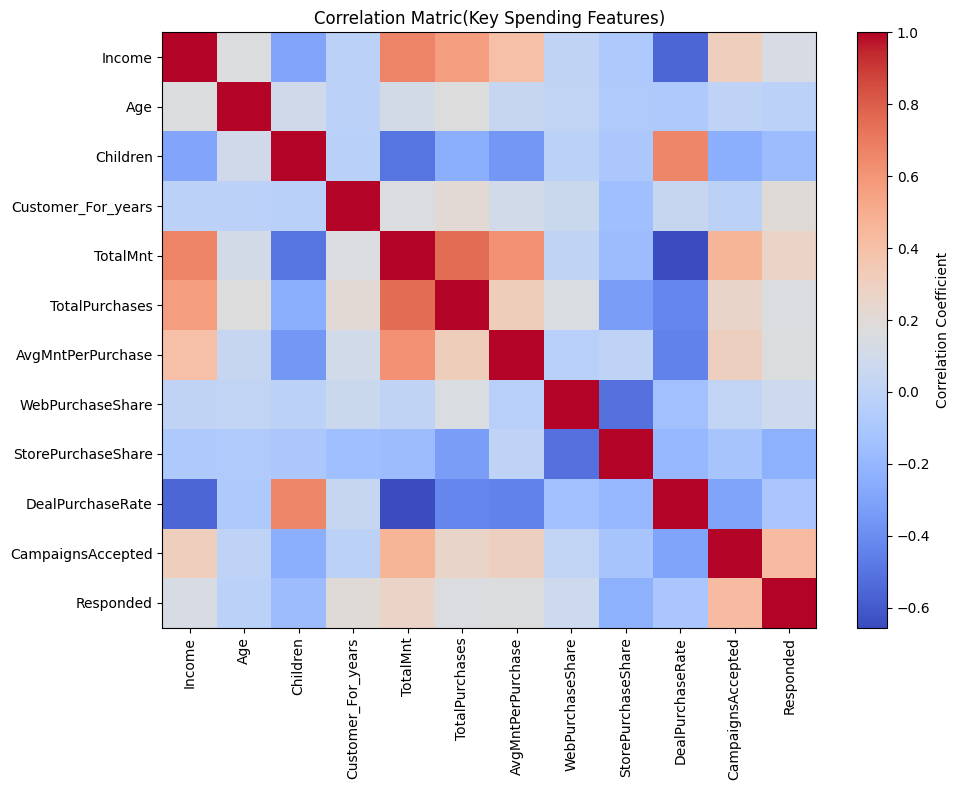

In [26]:
# Visual Correlation Heatmap
key_cols = [
    'Income', 'Age' , 'Children', 'Customer_For_years', 'TotalMnt', 'TotalPurchases',
    'AvgMntPerPurchase', 'WebPurchaseShare', 'catalogPurchaseShare',
    'StorePurchaseShare', 'DealPurchaseRate', 'CampaignsAccepted', 'Responded'
]


key_cols = [c for c in key_cols if c in df.columns]

plt.figure(figsize=(10, 8))
plt.imshow(df[key_cols].corr(), cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(key_cols)), key_cols, rotation=90)
plt.yticks(range(len(key_cols)), key_cols)
plt.title("Correlation Matric(Key Spending Features)")
plt.tight_layout()
plt.show()

## Correlation Analysis — Key Insights

### Overview
The correlation matrix and feature relationships reveal strong behavioral patterns that connect spending capacity, activity level, and shopping style.


###  1. Income and Total Spending
- **Strong positive correlation (~0.6–0.7)**  
  Higher income customers consistently spend more overall.  
  → *Income* is a key driver of spending capacity.


###  2. Total Purchases and Deal Purchase Rate
- **Moderate negative correlation (~–0.4)**  
  Customers who rely more on discounts make fewer purchases overall.  
  → Reflects *Saver* or *Deal-Seeker* behavior — they wait for promotions and buy selectively.


###  3. Channel Behavior
- **Store Purchase Share:** Negatively correlated with Total Purchases (~–0.3)  
  → In-store shoppers purchase less frequently (more deliberate, planned).

- **Web Purchase Share:** Positively correlated (likely +0.3)  
  → Online shoppers tend to buy more often — possibly more impulsive.


###  4. Family Impact
- **Children / Kidhome:** Negatively correlated with Total Purchases (~–0.25 to –0.48)  
  → More kids at home → tighter budgets and reduced discretionary spending.  
  Indicates a cautious, *Saver-type* pattern.


###  5. Age
- Weak negative correlation with Total Purchases.  
  → Spending doesn’t vary much by age; older customers are not necessarily higher spenders.


### 6.  Marketing Engagement
- **CampaignsAccepted & Responded:** Mild positive correlation with Total Spend (~+0.2).  
  → Engaged customers spend slightly more and may represent loyal *Planner* types.


###  Key Takeaways

| Behavior Dimension | Strong Indicators | Interpretation |
|--------------------|------------------|----------------|
| **Spending Capacity** | `Income`, `TotalMnt` | Financial ability to spend |
| **Spending Activity** | `TotalPurchases`, `AvgMntPerPurchase` | Frequency and basket size |
| **Impulse vs. Planning** | `DealPurchaseRate`, `WebPurchaseShare`, `StorePurchaseShare` | How spontaneous or deliberate the buyer is |
| **Engagement & Responsiveness** | `CampaignsAccepted`, `Responded` | Brand interaction and marketing response |

###  Overall Insight
- **High Income + Low Deal Rate → Splurger / Luxury Buyer**  
- **Low Income + High Deal Rate → Saver / Bargain Hunter**  
- **Moderate Income + Balanced Behavior → Planner / Practical Buyer**

These relationships form the foundation for our upcoming **Spending Personality Scoring Rules**, which will classify customers into interpretable segments for the MVP.


### Defining Personality Type

1. Saver → cautious, deal-seeking, low impulse
2. Splurger → high spenders, low restraint
3. Planner → balanced, consistent, thoughtful spenders
4. Impulse Buyer → spontaneous, high-frequency, high online activity

In [35]:
# Creating flags

def flag_by_percentile(series, low_q=0.33, high_q=0.67):
    low, high = series.quantile([low_q, high_q])
    return pd.cut(series, bins=[-float('inf'), low, high, float('inf')], labels=['Low', 'Medium', 'High'])


df['Income_level'] = flag_by_percentile(df['Income'])
df['Spending_level'] = flag_by_percentile(df['TotalMnt'])
df['Deal_level'] = flag_by_percentile(df['DealPurchaseRate'])
df['Online_level'] = flag_by_percentile(df['WebPurchaseShare'])
df['Response_level'] = pd.cut(         #### Beacuse most of the values are zero we use cut instead of quantile(I had an error priror to it)
    df['CampaignsAccepted'],
    bins=[-np.inf, 0, 1, np.inf],
    labels=['Low', 'Mid', 'High'],
    include_lowest=True
)


# Sanity Check
df[['Income_level', 'Spending_level', 'Deal_level', 'Online_level', 'Response_level']].head(10)

,Income_level,Spending_level,Deal_level,Online_level,Response_level
0,Medium,High,Medium,High,Low
1,Medium,Low,High,Low,Low
2,High,Medium,Low,High,Low
3,Low,Low,Medium,Medium,Low
4,Medium,Medium,High,Medium,Low
5,Medium,Medium,Low,Medium,Low
6,Medium,Medium,Medium,High,Low
7,Low,Medium,Medium,High,Low
8,Low,Low,Medium,High,Low
9,Low,Low,High,High,Mid


In [39]:
# Applying Personalyti Logis

def classify_personality(row):
    # Saver: deal-seeking, modes income/spend
    if row['Deal_level'] == 'High' and row['Income_level'] == 'High':
        return 'Saver'  
    
    # Splurger: high spenders, High Income
    elif row['Income_level'] == 'High' and row['Spending_level'] == 'High' and row['Deal_level'] != 'High':
        return 'Splurger'
    
    #Impulse Buyer: high online share, high deal rate
    elif row['Online_level'] == 'High' and row['Deal_level'] == 'Low':
        return 'Impulse Buyer'
    
    # Planner: balanced or engaged with campaigns
    elif row['Response_level'] == 'High' or (row['Deal_level'] == 'Medium' and row['Online_level'] == 'Medium'):
        return 'Planner'
    
    else: 
        return 'Planner' # Default to Planner
    

df['Personality_Type'] = df.apply(classify_personality, axis=1)
df['Personality_Type'].value_counts()

Personality_Type
Planner          1507
Splurger          597
Impulse Buyer     116
Saver              20
Name: count, dtype: int64

,Income,TotalMnt,TotalPurchases,DealPurchaseRate,WebPurchaseShare,AvgMntPerPurchase,CampaignsAccepted
Personality_Type,,,,,,,
Impulse Buyer,58125.19,615.03,17.66,0.07,0.41,34.85,0.27
Planner,41495.78,281.13,11.97,0.23,0.26,18.82,0.14
Saver,107103.20,908.10,24.35,0.33,0.23,36.58,0.25
Splurger,76382.50,1413.43,21.30,0.07,0.26,69.45,0.71


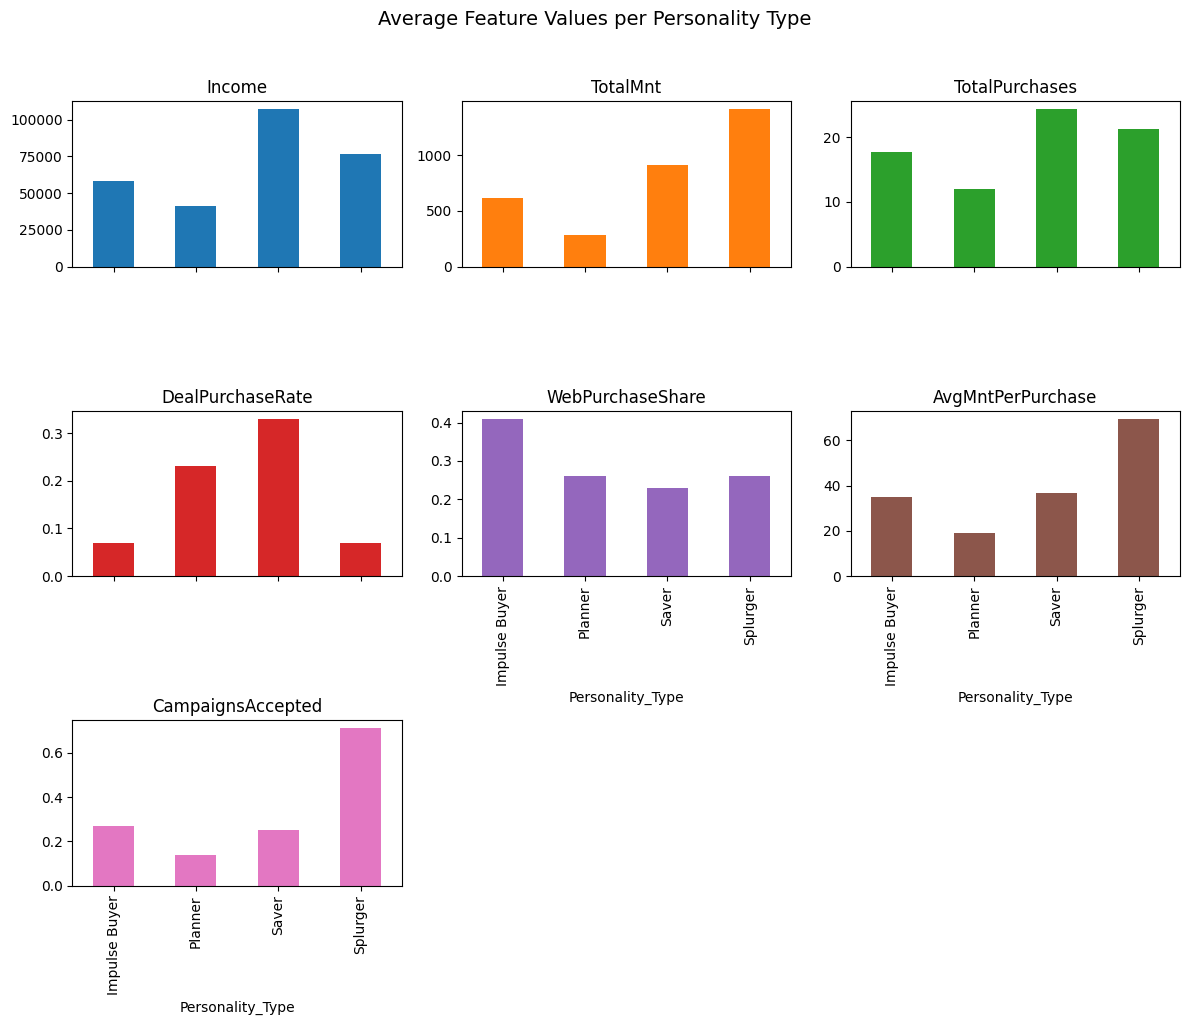

In [44]:
# Comparing Feature Profiles by Personality Type

summary = df.groupby('Personality_Type')[['Income', 'TotalMnt', 'TotalPurchases',
                                        'DealPurchaseRate', 'WebPurchaseShare',
                                        'AvgMntPerPurchase', 'CampaignsAccepted']].mean().round(2)

display(summary)


# Visualizing Personality Types
summary.plot(kind='bar', subplots=True, layout=(3,3), figsize=(12,10), legend=False, sharex=True)
plt.suptitle('Average Feature Values per Personality Type', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()